<a href="https://colab.research.google.com/github/Ganesh107/project_S8/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install Catboost
!pip install LightGBM
!pip install mlxtend
!pip install xgboost
%pip install mlxtend --upgrade

     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 1.3 MB 5.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [5]:
#IMPORTING NECCESSARY MODULES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier,Pool
import lightgbm as lgb
from sklearn import metrics
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
%matplotlib inline

In [6]:
diabetes_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv') # Reading the dataset into diabetes_data

In [7]:
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes_data.isnull().sum() # Count of null values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
diabetes_data_copy = diabetes_data.copy()
diabetes_data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
#replacing 0 ny NaN
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

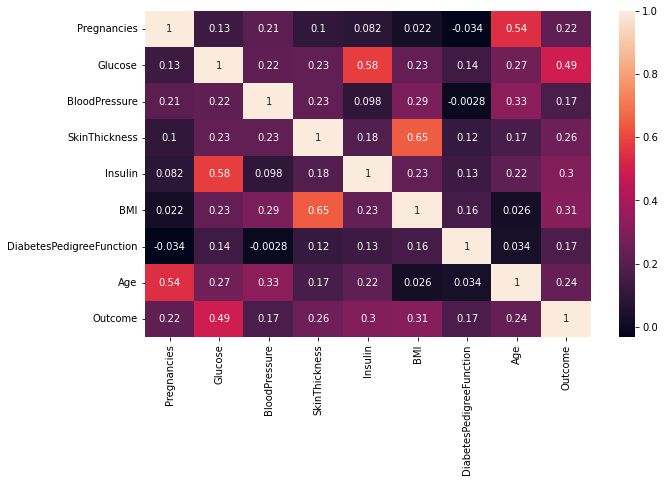

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(diabetes_data_copy.corr(),annot=True)

## FILLING MISSING VALUES

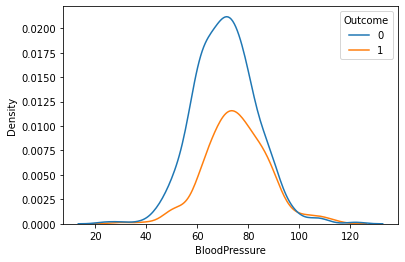

In [12]:
sns.kdeplot(x='BloodPressure',hue='Outcome',data=diabetes_data_copy)

In [13]:
diabetes_data_copy.groupby('Outcome')['BloodPressure'].median()

Outcome
0    70.0
1    74.5
Name: BloodPressure, dtype: float64

In [14]:
diabetes_data_copy.loc[(diabetes_data_copy['Outcome']==0)&(diabetes_data_copy['BloodPressure'].isnull()),'BloodPressure']=70
diabetes_data_copy.loc[(diabetes_data_copy['Outcome']==1)&(diabetes_data_copy['BloodPressure'].isnull()),'BloodPressure']=74.5

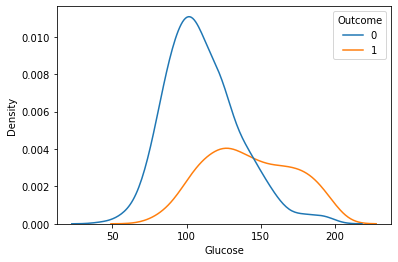

In [15]:
sns.kdeplot(x='Glucose',hue='Outcome',data=diabetes_data_copy)

In [16]:
diabetes_data_copy.groupby('Outcome')['Glucose'].median()

Outcome
0    107.0
1    140.0
Name: Glucose, dtype: float64

In [17]:
diabetes_data_copy.loc[(diabetes_data_copy['Outcome']==0)&(diabetes_data_copy['Glucose'].isnull()),'Glucose']=107
diabetes_data_copy.loc[(diabetes_data_copy['Outcome']==1)&(diabetes_data_copy['Glucose'].isnull()),'Glucose']=140

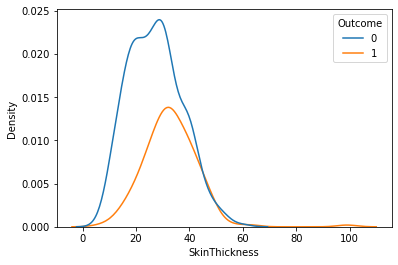

In [18]:
sns.kdeplot(x='SkinThickness',hue='Outcome',data=diabetes_data_copy)

In [19]:
diabetes_data_copy.groupby('Outcome')['SkinThickness'].median()

Outcome
0    27.0
1    32.0
Name: SkinThickness, dtype: float64

In [20]:
diabetes_data_copy.loc[(diabetes_data_copy['Outcome']==0)&(diabetes_data_copy['SkinThickness'].isnull()),'SkinThickness']=27
diabetes_data_copy.loc[(diabetes_data_copy['Outcome']==1)&(diabetes_data_copy['SkinThickness'].isnull()),'SkinThickness']=32

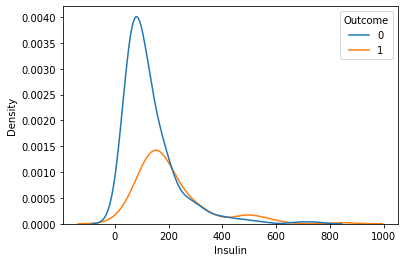

In [21]:
sns.kdeplot(x='Insulin',hue='Outcome',data=diabetes_data_copy)

In [22]:
diabetes_data_copy.groupby('Outcome')['Insulin'].median()

Outcome
0    102.5
1    169.5
Name: Insulin, dtype: float64

In [23]:
diabetes_data_copy.loc[(diabetes_data_copy['Outcome']==0)&(diabetes_data_copy['Insulin'].isnull()),'Insulin']=102.5
diabetes_data_copy.loc[(diabetes_data_copy['Outcome']==1)&(diabetes_data_copy['Insulin'].isnull()),'Insulin']=169.5

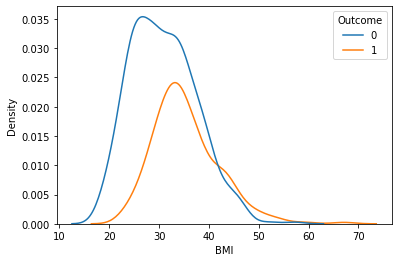

In [24]:
sns.kdeplot(x='BMI',hue='Outcome',data=diabetes_data_copy)

In [25]:
diabetes_data_copy.groupby('Outcome')['BMI'].median()

Outcome
0    30.1
1    34.3
Name: BMI, dtype: float64

In [26]:
diabetes_data_copy.loc[(diabetes_data_copy['Outcome']==0)&(diabetes_data_copy['BMI'].isnull()),'BMI']=30.1
diabetes_data_copy.loc[(diabetes_data_copy['Outcome']==1)&(diabetes_data_copy['BMI'].isnull()),'BMI']=34.3

In [27]:
diabetes_data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### STANDARDIZATION

In [28]:

scaler = StandardScaler()
cols_to_scale = diabetes_data_copy.drop(['Outcome'],axis=1)
y = diabetes_data_copy['Outcome']
std_diabetes_data = scaler.fit_transform(cols_to_scale)
std_diabetes_data = pd.DataFrame(data=std_diabetes_data,columns=diabetes_data_copy.columns[:-1])
std_diabetes_data['Outcome'] = diabetes_data_copy['Outcome']
std_diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995,1
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672,0
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584,1
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549,0
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496,1


In [29]:
std_diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,2.544261e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,1.604619e-16,1.000652,-2.551447,-0.720236,-0.153627,0.610062,2.539814
BloodPressure,768.0,-3.685926e-16,1.000652,-3.999727,-0.693438,-0.032180,0.629077,4.100681
SkinThickness,768.0,-3.928426e-17,1.000652,-2.486187,-0.460307,-0.122661,0.327535,7.868309
Insulin,768.0,-8.601337e-18,1.000652,-1.434747,-0.440843,-0.440843,0.311604,7.909072
BMI,768.0,1.054567e-16,1.000652,-2.070186,-0.717659,-0.055939,0.605782,5.041489
DiabetesPedigreeFunction,768.0,2.462585e-16,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,1.857600e-16,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716
Outcome,768.0,3.489583e-01,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


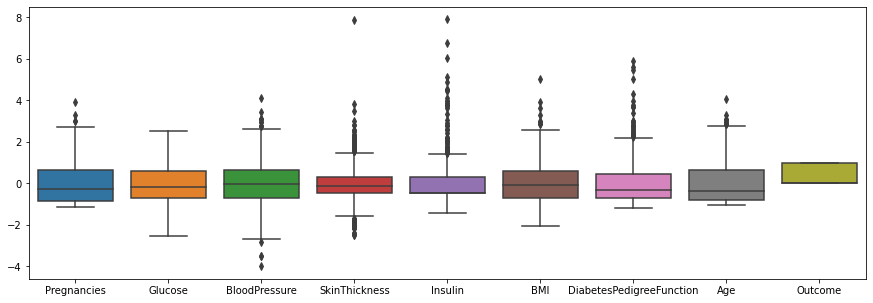

In [30]:
# DATA DISTRIBUTION AFTER STANDARDIZATION
plt.figure(figsize=(15,5))
sns.boxplot(data=std_diabetes_data)

## SMOTE ANALYSIS

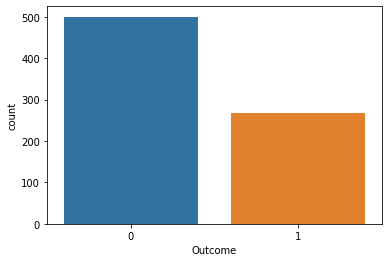

In [31]:
# OUTCOME DISTRIBUTION BEFORE SMOTE ANALYSIS
sns.countplot(data=std_diabetes_data,x='Outcome')

In [32]:
std_diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:

smote = SMOTE()
x = std_diabetes_data.drop(['Outcome'],axis=1)
y = std_diabetes_data['Outcome']
x_smote,y_smote = smote.fit_resample(x,y)
data_after_smote = pd.DataFrame(data=x_smote,columns=std_diabetes_data.columns[:-1])
data_after_smote['Outcome'] = pd.DataFrame(y_smote)
data_after_smote.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995,1
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672,0
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584,1


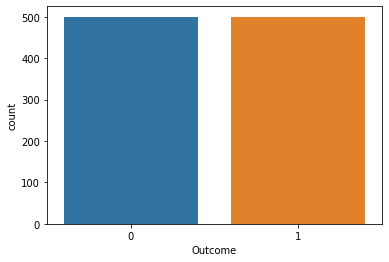

In [34]:
sns.countplot(data=data_after_smote,x='Outcome')

In [35]:
data_after_smote.shape

(1000, 9)

## FEATURE SELECTION

In [36]:
#BACKWARD SELECTION
x1 = diabetes_data_copy.drop(columns='Outcome',axis=1)
y1 = diabetes_data_copy['Outcome']
rf = RandomForestClassifier()
sfs1 = sfs(rf,k_features=6,forward=False,verbose=1,scoring='accuracy',cv=0)
sfs1 = sfs1.fit(x1,y1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.9s finished
Features: 7/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.5s finished
Features: 6/6

In [37]:
selected_features = list(sfs1.k_feature_names_)
print(selected_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


..............................................................................................................

## ALGORITHMS
### 1. CATBOOST

In [38]:
# prediction with selected features including smote analysis
x = data_after_smote.drop(columns=['DiabetesPedigreeFunction','Age','Outcome'],axis=1)
y = data_after_smote['Outcome']

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
eval_dataset = Pool(x_test,y_test)
model = CatBoostClassifier(eval_metric='AUC',depth=10, iterations= 500, learning_rate= 0.03)
model.fit(x_train,y_train,eval_set=eval_dataset)

0:	test: 0.9129413	best: 0.9129413 (0)	total: 70.1ms	remaining: 35s
1:	test: 0.9356936	best: 0.9356936 (1)	total: 91ms	remaining: 22.7s
2:	test: 0.9402940	best: 0.9402940 (2)	total: 109ms	remaining: 18s
3:	test: 0.9392439	best: 0.9402940 (2)	total: 127ms	remaining: 15.7s
4:	test: 0.9446945	best: 0.9446945 (4)	total: 153ms	remaining: 15.2s
5:	test: 0.9451945	best: 0.9451945 (5)	total: 176ms	remaining: 14.5s
6:	test: 0.9475948	best: 0.9475948 (6)	total: 201ms	remaining: 14.1s
7:	test: 0.9465947	best: 0.9475948 (6)	total: 218ms	remaining: 13.4s
8:	test: 0.9478948	best: 0.9478948 (8)	total: 236ms	remaining: 12.9s
9:	test: 0.9457946	best: 0.9478948 (8)	total: 257ms	remaining: 12.6s
10:	test: 0.9441944	best: 0.9478948 (8)	total: 280ms	remaining: 12.4s
11:	test: 0.9456946	best: 0.9478948 (8)	total: 297ms	remaining: 12.1s
12:	test: 0.9465947	best: 0.9478948 (8)	total: 314ms	remaining: 11.8s
13:	test: 0.9466947	best: 0.9478948 (8)	total: 332ms	remaining: 11.5s
14:	test: 0.9470947	best: 0.947894

In [41]:
model.get_best_score()

{'learn': {'Logloss': 0.01335829496383667},
 'validation': {'AUC': 0.9647964796479648, 'Logloss': 0.2530593884055298}}

In [42]:
predicted_y = model.predict(x_test)
mat = metrics.confusion_matrix(y_test,predicted_y)
print(mat)

[[85 14]
 [ 8 93]]


In [43]:
accuracy = (mat[0][0]+mat[1][1]) / (mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])
print(accuracy*100)

89.0


In [44]:
#prediction with all features excluding smote analysis
x = std_diabetes_data.drop(columns=['Outcome'],axis=1)
y = std_diabetes_data['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
eval_dataset = Pool(x_test,y_test)
model = CatBoostClassifier(eval_metric='AUC',depth=12, iterations= 500, learning_rate= 0.02)
model.fit(x_train,y_train,eval_set=eval_dataset,verbose=False)

In [45]:
model.best_score_

{'learn': {'Logloss': 0.019190324983462473},
 'validation': {'AUC': 0.9406795224977044, 'Logloss': 0.29745058168784444}}

In [46]:
predicted_y = model.predict(x_test)
mat = metrics.confusion_matrix(y_test,predicted_y)
print(mat)

[[87 12]
 [ 8 47]]


In [47]:
accuracy = (mat[0][0]+mat[1][1]) / (mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])
print(accuracy*100)

87.01298701298701


CATBOOST
1. With smote analysis
    AUC =      96.40,
    Accuracy = 89
2. without smote analysis
    AUC =      93.81,
    Accuracy = 87.01

### 2. LIGHTGBM

In [48]:
# prediction with selected features including smote analysis
x = data_after_smote.drop(columns=['Age','DiabetesPedigreeFunction','Outcome'],axis=1)
y = data_after_smote['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
gbmmodel = lgb.LGBMClassifier(learning_rate=0.05, max_depth=5, min_child_samples=5,n_estimators=1000, num_leaves=40, reg_alpha=0.02)
gbmmodel.fit(x_train,y_train,eval_set=[(x_test,y_test)],eval_metric='AUC',verbose=False)

LGBMClassifier(learning_rate=0.05, max_depth=5, min_child_samples=5,
               n_estimators=1000, num_leaves=40, reg_alpha=0.02)

In [49]:
gbmmodel.best_score_

defaultdict(dict,
            {'valid_0': {'auc': 0.9512951295129513,
              'binary_logloss': 0.49451505929211204}})

In [50]:
predicted_y = gbmmodel.predict(x_test)
mat = metrics.confusion_matrix(y_test,predicted_y)
print(mat)

[[88 11]
 [12 89]]


In [51]:
accuracy = (mat[0][0]+mat[1][1]) / (mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])
print(accuracy*100)

88.5


In [52]:
#prediction with all features excluding smote analysis
x = diabetes_data_copy.drop(columns=['Outcome'],axis=1)
y = diabetes_data_copy['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
gbmmodel = lgb.LGBMClassifier(learning_rate=0.05, max_depth=5, min_child_samples=5, n_estimators=1000, num_leaves=40, reg_alpha=0.02)
gbmmodel.fit(x_train,y_train,eval_set=[(x_test,y_test)],eval_metric='AUC',verbose=False)

LGBMClassifier(learning_rate=0.05, max_depth=5, min_child_samples=5,
               n_estimators=1000, num_leaves=40, reg_alpha=0.02)

In [53]:
gbmmodel.best_score_

defaultdict(dict,
            {'valid_0': {'auc': 0.9338842975206612,
              'binary_logloss': 0.6023725185785883}})

In [54]:
predicted_y = gbmmodel.predict(x_test)
mat = metrics.confusion_matrix(y_test,predicted_y)
print(mat)

[[88 11]
 [ 9 46]]


In [55]:
accuracy = (mat[0][0]+mat[1][1]) / (mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])
print(accuracy*100)

87.01298701298701


LIGHTGBM
1. With smote analysis
    AUC =      93.92,
    Accuracy = 89
2. without smote analysis
    AUC =      93.38,
    Accuracy = 87.01

### HYPERPARAMETER TUNING

In [56]:
"""
#Grid search for LightGBM
 parameters = {'num_leaves':[20,40,80,100],
             'min_child_samples':[5,10,15],
             'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.03,0.02,0.01],
             'reg_alpha':[0.1,0.02,0.03,0.5]}
halving_srch = HalvingGridSearchCV(estimator=gbmmodel,param_grid=parameters,scoring='accuracy')
halving_srch.fit(x_train,y_train)
"""

"\n#Grid search for LightGBM\n parameters = {'num_leaves':[20,40,80,100],\n             'min_child_samples':[5,10,15],\n             'max_depth':[-1,5,10,20],\n             'learning_rate':[0.05,0.03,0.02,0.01],\n             'reg_alpha':[0.1,0.02,0.03,0.5]}\nhalving_srch = HalvingGridSearchCV(estimator=gbmmodel,param_grid=parameters,scoring='accuracy')\nhalving_srch.fit(x_train,y_train)\n"

In [57]:
#halving_srch.best_estimator_

In [58]:
"""
#Grid search for Catboost
parameters = {'depth':[9,10,12,13],
          'iterations':[250,500,1000],
          'learning_rate':[0.03,0.01,0.02,0.04]}
srch_model = HalvingGridSearchCV(estimator=model,param_grid=parameters,scoring='accuracy')
srch_model.fit(x_train,y_train)
"""

"\n#Grid search for Catboost\nparameters = {'depth':[9,10,12,13],\n          'iterations':[250,500,1000],\n          'learning_rate':[0.03,0.01,0.02,0.04]}\nsrch_model = HalvingGridSearchCV(estimator=model,param_grid=parameters,scoring='accuracy')\nsrch_model.fit(x_train,y_train)\n"

In [59]:
#srch_model.best_params_

In [60]:
"""
xg_model = xgb.XGBClassifier()
parameters_xb = {                                          
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.5, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
srch_model = HalvingGridSearchCV(estimator=xg_model,param_grid=parameters_xb,scoring='accuracy')
srch_model.fit(x_train,y_train)
srch_model.best_params_
"""

"\nxg_model = xgb.XGBClassifier()\nparameters_xb = {                                          \n        'min_child_weight': [1, 5, 10],\n        'gamma': [0.5, 1, 1.5, 2, 5],\n        'subsample': [0.5, 1.0],\n        'colsample_bytree': [0.6, 0.8, 1.0],\n        'max_depth': [3, 4, 5]\n        }\nsrch_model = HalvingGridSearchCV(estimator=xg_model,param_grid=parameters_xb,scoring='accuracy')\nsrch_model.fit(x_train,y_train)\nsrch_model.best_params_\n"

In [61]:
"""
ad_clf = AdaBoostClassifier()
parameters_ab = { 'learning_rate':[0.01,0.05,0.04,0.03,0.02],
                   'n_estimators': [10,50,100,200,500]}
srch_model = HalvingGridSearchCV(estimator=ad_clf,param_grid=parameters_ab,scoring='accuracy')
srch_model.fit(x_train,y_train)
srch_model.best_params_
"""

"\nad_clf = AdaBoostClassifier()\nparameters_ab = { 'learning_rate':[0.01,0.05,0.04,0.03,0.02],\n                   'n_estimators': [10,50,100,200,500]}\nsrch_model = HalvingGridSearchCV(estimator=ad_clf,param_grid=parameters_ab,scoring='accuracy')\nsrch_model.fit(x_train,y_train)\nsrch_model.best_params_\n"

## ENSEMBLED MODELS

In [68]:
#catboost + lightgbm
x = data_after_smote.drop(columns=['Age','DiabetesPedigreeFunction','Outcome'],axis=1)
y = data_after_smote['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = CatBoostClassifier(depth=10, iterations= 500, learning_rate= 0.03)
gbmmodel = lgb.LGBMClassifier(learning_rate=0.05, max_depth=5, min_child_samples=5,n_estimators=1000, num_leaves=40, reg_alpha=0.02)
voting_clf = VotingClassifier(estimators=[('cb',model),('lgb',gbmmodel)],voting='soft')
voting_clf.fit(x_train,y_train)

0:	learn: 0.6586980	total: 17ms	remaining: 8.48s
1:	learn: 0.6280189	total: 34ms	remaining: 8.47s
2:	learn: 0.5991632	total: 50.5ms	remaining: 8.36s
3:	learn: 0.5793357	total: 67ms	remaining: 8.31s
4:	learn: 0.5557043	total: 83.9ms	remaining: 8.31s
5:	learn: 0.5323336	total: 101ms	remaining: 8.29s
6:	learn: 0.5134152	total: 120ms	remaining: 8.44s
7:	learn: 0.4948203	total: 138ms	remaining: 8.46s
8:	learn: 0.4744553	total: 155ms	remaining: 8.48s
9:	learn: 0.4576153	total: 173ms	remaining: 8.47s
10:	learn: 0.4407438	total: 191ms	remaining: 8.47s
11:	learn: 0.4269743	total: 210ms	remaining: 8.55s
12:	learn: 0.4121006	total: 233ms	remaining: 8.72s
13:	learn: 0.3983624	total: 254ms	remaining: 8.81s
14:	learn: 0.3870240	total: 271ms	remaining: 8.77s
15:	learn: 0.3760421	total: 288ms	remaining: 8.72s
16:	learn: 0.3634643	total: 306ms	remaining: 8.69s
17:	learn: 0.3534721	total: 324ms	remaining: 8.66s
18:	learn: 0.3433935	total: 341ms	remaining: 8.64s
19:	learn: 0.3344564	total: 370ms	remainin

VotingClassifier(estimators=[('cb',
                              <catboost.core.CatBoostClassifier object at 0x7ff402a60510>),
                             ('lgb',
                              LGBMClassifier(learning_rate=0.05, max_depth=5,
                                             min_child_samples=5,
                                             n_estimators=1000, num_leaves=40,
                                             reg_alpha=0.02))],
                 voting='soft')

In [69]:
y_pred = voting_clf.predict(x_test)
mat = metrics.confusion_matrix(y_test,y_pred)
print(mat)

[[88 11]
 [ 8 93]]


In [70]:
accuracy = (mat[0][0]+mat[1][1]) / (mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])
print(accuracy*100)

90.5


In [71]:
#LightGbm + xgboost
xgb_clf = xgb.XGBClassifier(colsample_bytree= 0.8,gamma = 2,max_depth= 5,min_child_weight=1,subsample=1.0)
voting_clf = VotingClassifier(estimators=[('cb',model),('xgb',xgb_clf)],voting='soft')
voting_clf.fit(x_train,y_train)
y_pred = voting_clf.predict(x_test)
mat = metrics.confusion_matrix(y_test,y_pred)
print(mat)
accuracy = (mat[0][0]+mat[1][1]) / (mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])
print(accuracy*100)

0:	learn: 0.6586980	total: 74.6ms	remaining: 37.2s
1:	learn: 0.6280189	total: 140ms	remaining: 34.7s
2:	learn: 0.5991632	total: 203ms	remaining: 33.7s
3:	learn: 0.5793357	total: 249ms	remaining: 30.9s
4:	learn: 0.5557043	total: 322ms	remaining: 31.8s
5:	learn: 0.5323336	total: 377ms	remaining: 31.1s
6:	learn: 0.5134152	total: 444ms	remaining: 31.2s
7:	learn: 0.4948203	total: 510ms	remaining: 31.3s
8:	learn: 0.4744553	total: 563ms	remaining: 30.7s
9:	learn: 0.4576153	total: 625ms	remaining: 30.6s
10:	learn: 0.4407438	total: 692ms	remaining: 30.7s
11:	learn: 0.4269743	total: 755ms	remaining: 30.7s
12:	learn: 0.4121006	total: 820ms	remaining: 30.7s
13:	learn: 0.3983624	total: 886ms	remaining: 30.7s
14:	learn: 0.3870240	total: 925ms	remaining: 29.9s
15:	learn: 0.3760421	total: 960ms	remaining: 29s
16:	learn: 0.3634643	total: 987ms	remaining: 28.1s
17:	learn: 0.3534721	total: 1.02s	remaining: 27.2s
18:	learn: 0.3433935	total: 1.05s	remaining: 26.7s
19:	learn: 0.3344564	total: 1.09s	remainin

In [74]:
#Catboost + Adaboost
ad_clf = AdaBoostClassifier(learning_rate= 0.04, n_estimators= 500)
voting_clf = VotingClassifier(estimators=[('cb',model),('ab',ad_clf)],voting='soft')
voting_clf.fit(x_train,y_train)
y_pred = voting_clf.predict(x_test)
mat = metrics.confusion_matrix(y_test,y_pred)
print(mat)
accuracy = (mat[0][0]+mat[1][1]) / (mat[0][0]+mat[0][1]+mat[1][0]+mat[1][1])
print(accuracy*100)

0:	learn: 0.6586980	total: 31.9ms	remaining: 15.9s
1:	learn: 0.6280189	total: 66ms	remaining: 16.4s
2:	learn: 0.5991632	total: 102ms	remaining: 16.9s
3:	learn: 0.5793357	total: 134ms	remaining: 16.6s
4:	learn: 0.5557043	total: 167ms	remaining: 16.5s
5:	learn: 0.5323336	total: 196ms	remaining: 16.2s
6:	learn: 0.5134152	total: 236ms	remaining: 16.6s
7:	learn: 0.4948203	total: 270ms	remaining: 16.6s
8:	learn: 0.4744553	total: 299ms	remaining: 16.3s
9:	learn: 0.4576153	total: 324ms	remaining: 15.9s
10:	learn: 0.4407438	total: 348ms	remaining: 15.5s
11:	learn: 0.4269743	total: 382ms	remaining: 15.5s
12:	learn: 0.4121006	total: 414ms	remaining: 15.5s
13:	learn: 0.3983624	total: 450ms	remaining: 15.6s
14:	learn: 0.3870240	total: 472ms	remaining: 15.3s
15:	learn: 0.3760421	total: 502ms	remaining: 15.2s
16:	learn: 0.3634643	total: 534ms	remaining: 15.2s
17:	learn: 0.3534721	total: 560ms	remaining: 15s
18:	learn: 0.3433935	total: 584ms	remaining: 14.8s
19:	learn: 0.3344564	total: 611ms	remaining

1.Catboost+LightGBM,accuracy = 90.5

2.LightGBM+XGBoost,accuracy  = 89

3.Catboost+AdaBoost,accuracy = 89.5 